## 一元线性回归模型

y = a + bx + ε

其中，a为模型的截距项，b为模型的斜率项，ε为模型的误差项。

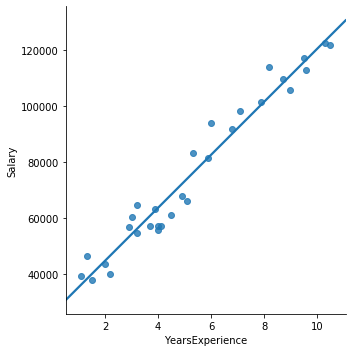

In [7]:
# 导入第三方模块
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 导入数据集
income = pd.read_csv('Salary_Data.csv')
# 绘制散点图
sns.lmplot(x = 'YearsExperience', y = 'Salary', data = income, ci = None)
# 显示图形
plt.show()

使用最小二乘法求解a和b

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g916ponxuvj30ly03fweq.jpg)

问题转化为求解函数J(a,b)的最小值，使用偏导数的方法求解出参数a和b，进而得到目标函数的最小值。

第一步：展开平方项

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g916vj2vpej30ro04faag.jpg)

第二步：设偏导数为0

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g916vv2hhzj30p10853za.jpg)

第三步：和公式转换

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g916w6zg1hj30mc08e751.jpg)

第四步：化解

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g916wimhn9j30qs079js5.jpg)

第五步：将参数a带入，求解b

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g916wwc5xfj30h106maal.jpg)

In [8]:
# 使用第三方模块statsmodels的ols函数

# 导入第三方模块
import statsmodels.api as sm
# 利用收入数据集，构建回归模型
fit = sm.formula.ols('Salary ~ YearsExperience', data = income).fit()
# 返回模型的参数值
fit.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

## 多元线性回归模型

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g917t56dinj30jc05yt93.jpg)

y=β0+β1x1+β2x2+…+βpxn+ε

第一步：构建目标函数

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g917uc9iifj30f8036dfy.jpg)

第二步：展开平方项

J(β)=(y-Xβ)'(y-Xβ)

=(y'-β'X')(y-Xβ)

=(y'y-y'Xβ-β'X'y+β'X'Xβ)

第三步：求偏导

![](https://tva1.sinaimg.cn/large/006y8mN6ly1g917utrwz4j30jk03k3yq.jpg)

第四步：计算偏回归系数的值

X'Xβ=X'y

β=(X'X)-1X'y

In [13]:
# 导入模块
from sklearn import model_selection
# 导入数据
Profit = pd.read_excel('Predict to Profit.xlsx')
# 将数据集拆分为训练集和测试集
train, test = model_selection.train_test_split(Profit, test_size = 0.2, random_state=1234)
# 根据train数据集建模
model = sm.formula.ols('Profit ~ RD_Spend + Administration + Marketing_Spend + C(State)', data = train).fit()
print('模型的偏回归系数分别为：\n', model.params)
# 删除test数据集中的Profit变量，用剩下的自变量进行预测
test_X = test.drop(labels = 'Profit', axis = 1)
pred = model.predict(exog = test_X)
print('对比预测值和实际值的差异：\n',pd.DataFrame({'Prediction':pred,'Real':test.Profit}))

模型的偏回归系数分别为：
 Intercept               58581.516503
C(State)[T.Florida]       927.394424
C(State)[T.New York]     -513.468310
RD_Spend                    0.803487
Administration             -0.057792
Marketing_Spend             0.013779
dtype: float64
对比预测值和实际值的差异：
        Prediction       Real
8   150621.345802  152211.77
48   55513.218079   35673.41
14  150369.022458  132602.65
42   74057.015562   71498.49
29  103413.378282  101004.64
44   67844.850378   65200.33
4   173454.059692  166187.94
31   99580.888895   97483.56
13  128147.138397  134307.35
18  130693.433835  124266.90


In [14]:
# 生成由State变量衍生的哑变量
dummies = pd.get_dummies(Profit.State)
# 将哑变量与原始数据集水平合并
Profit_New = pd.concat([Profit,dummies], axis = 1)
# 删除State变量和California变量（因为State变量已被分解为哑变量，New York变量需要作为参照组）
Profit_New.drop(labels = ['State','New York'], axis = 1, inplace = True)

# 拆分数据集Profit_New
train, test = model_selection.train_test_split(Profit_New, test_size = 0.2, random_state=1234)
# 建模
model2 = sm.formula.ols('Profit ~ RD_Spend + Administration + Marketing_Spend + Florida + California', data = train).fit()
print('模型的偏回归系数分别为：\n', model2.params)

模型的偏回归系数分别为：
 Intercept          58068.048193
RD_Spend               0.803487
Administration        -0.057792
Marketing_Spend        0.013779
Florida             1440.862734
California           513.468310
dtype: float64


Profit=58068.05+0.80RD_Spend-0.06Administation+0.01Marketing_Spend+1440.86Florida+513.47California